In [1]:
from loadFilteredData import *
#loading all data
origImg = loadAllTopicData('original')
# gingham = loadAllTopicData('gingham')
clarendon = loadAllTopicData('clarendon')
#juno = loadAllTopicData('juno')
# lark = loadAllTopicData('lark')
# gotham = loadAllTopicData('gotham')
# reyes = loadAllTopicData('reyes')

['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)


In [4]:
def createDataPlaces(images, trainPercentage, validationPercentage):
    categories = len(images)

    imgList = []
    vectors = []

    testImgList = []
    testVectors = []

    valImgList = []
    valVectors = []
    

    #data for original image
    for c in range(categories):
        numImages = images[c].shape[0]
        print(numImages)
        numTrain = int(numImages * trainPercentage)
        numVal = int(numTrain * validationPercentage)
        
        imgList.append(images[c][:numTrain - numVal])
        
        valImgList.append(images[c][numTrain - numVal:numTrain])

        featureVector = np.zeros((numTrain - numVal, categories))
        featureVector[:, c] = 1
        vectors.append(featureVector)
        
        featureVector = np.zeros((numVal, categories))
        featureVector[:, c] = 1
        valVectors.append(featureVector)
    
        #testing data
        testImgList.append(images[c][numTrain:])

        featureVector = np.zeros((numImages - numTrain, categories))
        featureVector[:, c] = 1
        testVectors.append(featureVector)


    X = np.vstack(imgList)
    y = np.vstack(vectors)

    Xtest = np.vstack(testImgList)
    ytest = np.vstack(testVectors)
    
    Xval = np.vstack(valImgList)
    yval = np.vstack(valVectors)

    X, y = shuffle(X, y, random_state=0)
    Xtest, ytest = shuffle(Xtest, ytest, random_state=0)
    Xval, yval = shuffle(Xval, yval, random_state=0)
    
    return X, y, Xtest, ytest, Xval, yval
# X, y, Xtest, ytest = createDataPlaces([origImg, clarendon, gingham, juno, lark, gotham, reyes], .9)
X, y, Xtest, ytest, Xval, yval = createDataPlaces([origImg, clarendon], .9, .005)

9000
9000


In [5]:
print(Xval.shape)
print(yval.shape)

(80, 128, 128, 3)
(80, 2)


In [6]:
def splitImg(X, y):
    Xsmall = []
    ysmall = []
    for i in range(X.shape[0]):
        l = 0
        for j in range(0, X.shape[1], X.shape[1] // 4):
            for k in range(0, X.shape[1], X.shape[1] // 4):
                block = X[i, j : j + 32, k : k + 32]
                Xsmall.append(block)
                ysmall.append(y[i])
                l += 1
    Xsmall = np.array(Xsmall)
    ysmall = np.array(ysmall)
    return Xsmall, ysmall

In [7]:
Xsmall, ysmall = splitImg(X, y)

In [8]:
Xsmall.shape

(257920, 32, 32, 3)

In [9]:
XvalSmall, yvalSmall = splitImg(Xval, yval)

In [10]:
XvalSmall.shape

(1280, 32, 32, 3)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), strides=2))
model.add(LeakyReLU(alpha=0.5))
model.add(Conv2D(32, (3, 3), strides = 2))
model.add(LeakyReLU(alpha=0.5))
model.add(MaxPooling2D(pool_size=3, strides =2))
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.3))
# model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [12]:
model.fit(Xsmall, ysmall, epochs=5, batch_size=128, validation_data=(XvalSmall, yvalSmall))

Train on 257920 samples, validate on 1280 samples
Epoch 1/5
257920/257920 [==============================] - 29s 113us/step - loss: 2.5714 - acc: 0.7365 - val_loss: 0.2310 - val_acc: 0.9133
Epoch 2/5
257920/257920 [==============================] - 26s 101us/step - loss: 0.3389 - acc: 0.8441 - val_loss: 0.1395 - val_acc: 0.9414
Epoch 3/5
257920/257920 [==============================] - 26s 100us/step - loss: 0.2806 - acc: 0.8661 - val_loss: 0.0863 - val_acc: 0.9648
Epoch 4/5
257920/257920 [==============================] - 25s 98us/step - loss: 0.2489 - acc: 0.8781 - val_loss: 0.0651 - val_acc: 0.9672
Epoch 5/5
257920/257920 [==============================] - 25s 98us/step - loss: 0.2373 - acc: 0.8828 - val_loss: 0.0866 - val_acc: 0.9625


In [13]:
XtestSmall, ytestSmall = splitImg(Xtest, ytest)

predict = model.predict(XtestSmall)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytestSmall.argmax(axis=1), predict.argmax(axis=1)))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytestSmall.argmax(axis=1), predict.argmax(axis=1)))
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(ytestSmall.argmax(axis=1), predict.argmax(axis=1))

[[14256   144]
 [ 1557 12843]]
0.9409375


(array([0.90153671, 0.98891199]),
 array([0.99    , 0.891875]),
 array([0.94369973, 0.93789024]),
 array([14400, 14400], dtype=int64))

In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), strides=2))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(32, (3, 3), strides = 2))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=3, strides =2))
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.3))
# model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
model.fit(Xsmall, ysmall, epochs=150, batch_size=128, validation_split=0.01)

Train on 256608 samples, validate on 2592 samples
Epoch 1/150
 34304/256608 [===>..........................] - ETA: 30s - loss: 1.3212 - acc: 0.6842

KeyboardInterrupt: 

In [2]:
def createImageData(images, trainPercentage):
    categories = len(images)

    imgList = []
    vectors = []

    testImgList = []
    testVectors = []


    #data for original image
    for c in range(categories):
        numImages = images[c].shape[0]
        print(numImages)
        numTrain = int(numImages * trainPercentage)
        imgList.append(images[c][:numTrain])

        featureVector = np.zeros((numTrain, categories))
        featureVector[:, c] = 1
#         vectors.append(featureVector)
        vectors.append(images[0][:numTrain])
    
        #testing data
        testImgList.append(images[c][numTrain:])

        featureVector = np.zeros((numImages - numTrain, categories))
        featureVector[:, c] = 1
#         testVectors.append(featureVector)
        testVectors.append(images[0][numTrain:])


    X = np.vstack(imgList)
    y = np.vstack(vectors)

    Xtest = np.vstack(testImgList)
    ytest = np.vstack(testVectors)

    X, y = shuffle(X, y, random_state=0)
    Xtest, ytest = shuffle(Xtest, ytest, random_state=0)
    return X, y, Xtest, ytest
# X, y, Xtest, ytest = createDataPlaces([origImg, clarendon, gingham, juno, lark, gotham, reyes], .9)
imX, imy, imXtest, imytest = createImageData([origImg, clarendon], .9)

9000
9000


In [3]:
def divideImages(X, y):
    imXsmall = []
    imysmall = []
    for i in range(X.shape[0]):
        l = 0
        for j in range(0, X.shape[1], X.shape[1] // 4):
            for k in range(0, X.shape[1], X.shape[1] // 4):
                blockX = X[i, j : j + 32, k : k + 32]
                blocky = y[i, j : j + 32, k : k + 32]
                imXsmall.append(blockX)
                imysmall.append(blocky)
                l += 1
    imXsmall = np.array(imXsmall)
    imysmall = np.array(imysmall)
    return imXsmall, imysmall
imXsmall, imysmall = divideImages(imX, imy)
imXsmall, imysmall = shuffle(imXsmall, imysmall, random_state=0)

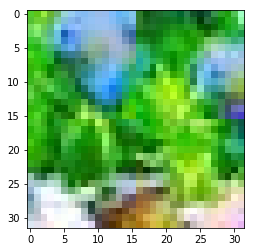

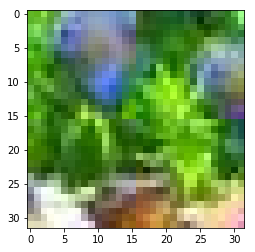

255187
[[ 15   0 250 ...  13   9 254]
 [  6 251   0 ...  18  10   2]
 [255 253 254 ...  28  18   8]
 ...
 [244 245 252 ...   4  10   7]
 [  2 242 247 ...   0   7  10]
 [  7 253 244 ...   0   2 250]]


In [6]:
imsmallResidual = imysmall - imXsmall
i = 442
plt.imshow(imXsmall[i])
plt.show()
plt.imshow(imysmall[i])
plt.show()
print(np.sum(np.abs(imXsmall[i] - imysmall[i])))
print(imsmallResidual[i][:,:, 0])

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(3, (3, 3), padding='same'))
# model.add(MaxPooling2D(pool_size=3, strides =2))
# model.add(Flatten())
# model.add(Dense(128))
# model.add(LeakyReLU(alpha=0.3))
# model.add(Dense(256))
# model.add(LeakyReLU(alpha=0.3))
# model.add(Conv2DTranspose(32, (3, 3), strides = 2))
# model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), strides=2))
# model.add(Dropout(0.5))
#model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [36]:
model.fit(imXsmall, imysmall, epochs=5, batch_size=256, validation_split=0.01)

Train on 256608 samples, validate on 2592 samples
Epoch 1/5
256608/256608 [==============================] - 276s 1ms/step - loss: 238.7359 - mean_absolute_error: 9.8750 - val_loss: 124.9663 - val_mean_absolute_error: 7.6412
Epoch 2/5
256608/256608 [==============================] - 278s 1ms/step - loss: 116.3501 - mean_absolute_error: 7.5364 - val_loss: 115.0949 - val_mean_absolute_error: 7.2962
Epoch 3/5
256608/256608 [==============================] - 278s 1ms/step - loss: 110.9506 - mean_absolute_error: 7.3351 - val_loss: 115.9263 - val_mean_absolute_error: 7.7727
Epoch 4/5
256608/256608 [==============================] - 277s 1ms/step - loss: 106.0021 - mean_absolute_error: 7.1123 - val_loss: 106.4393 - val_mean_absolute_error: 6.9574
Epoch 5/5
256608/256608 [==============================] - 276s 1ms/step - loss: 101.7577 - mean_absolute_error: 6.9179 - val_loss: 104.9793 - val_mean_absolute_error: 7.0280


In [15]:
np.mean(np.abs(imXsmall - imysmall))

36.88275642552003

In [37]:
from keras.models import load_model
model.save('EndToEndNN0.h5')